In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
metrics_2012 = np.load("./document_level_metrics/train-year-2012.npy", allow_pickle=True).item()
print(metrics_2012)

{2012: {'eval_loss': 3.1113810539245605, 'eval_runtime': 266.36, 'eval_samples_per_second': 19.827, 'eval_steps_per_second': 1.243, 'epoch': 1.0}, 2013: {'eval_loss': 3.2066714763641357, 'eval_runtime': 299.3471, 'eval_samples_per_second': 19.88, 'eval_steps_per_second': 1.243, 'epoch': 1.0}, 2014: {'eval_loss': 3.1979284286499023, 'eval_runtime': 320.473, 'eval_samples_per_second': 19.874, 'eval_steps_per_second': 1.245, 'epoch': 1.0}, 2015: {'eval_loss': 3.1861016750335693, 'eval_runtime': 326.2901, 'eval_samples_per_second': 19.875, 'eval_steps_per_second': 1.244, 'epoch': 1.0}, 2016: {'eval_loss': 3.1606438159942627, 'eval_runtime': 340.249, 'eval_samples_per_second': 19.882, 'eval_steps_per_second': 1.243, 'epoch': 1.0}, 2017: {'eval_loss': 3.324777364730835, 'eval_runtime': 391.9027, 'eval_samples_per_second': 19.877, 'eval_steps_per_second': 1.243, 'epoch': 1.0}, 2018: {'eval_loss': 3.3093581199645996, 'eval_runtime': 379.2926, 'eval_samples_per_second': 19.876, 'eval_steps_per_

In [36]:
def get_metric_array(dir_name, metric_name):
  metrics = np.zeros((10, 10))
  for train_year in range(2012, 2022):
    train_metrics = np.load(dir_name + "/train-year-" + str(train_year) + ".npy", allow_pickle=True).item()
    for test_year, stats in train_metrics.items():
      metrics[train_year - 2012][test_year - 2012] = stats[metric_name]
  return metrics

In [37]:
doc_perplexities = get_metric_array("./document_level_metrics", "eval_loss") ** 2

Text(0.5, 1.0, '100k documents train, 5k documents eval')

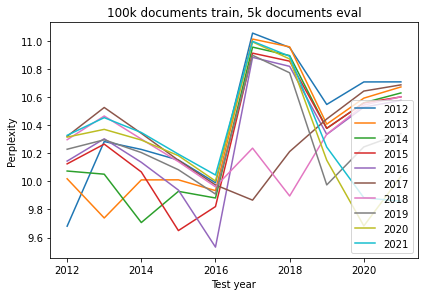

In [38]:
for i in range(10):
  plt.plot(doc_perplexities[i], label=(2012 + i))

plt.ylabel("Perplexity")
ticks = list(range(0, 10, 2))
tick_labels = list(range(2012, 2022, 2))
plt.xticks(ticks=ticks, labels=tick_labels)
plt.xlabel("Test year")
plt.legend()
plt.tight_layout()
plt.title("100k documents train, 5k documents eval")

In [39]:
def heatmap_from_metric(metric, metric_name):
  plt.imshow(metric)
  cbar = plt.colorbar()
  cbar.ax.get_yaxis().labelpad = 15
  cbar.ax.set_ylabel(metric_name, rotation=270)
  ticks = list(range(0, 10, 2))
  tick_labels = list(range(2012, 2022, 2))
  plt.xticks(ticks=ticks, labels=tick_labels)
  plt.yticks(ticks=ticks, labels=tick_labels)
  plt.xlabel("Train year")
  plt.ylabel("Test year")
  plt.tight_layout()
  plt.show()

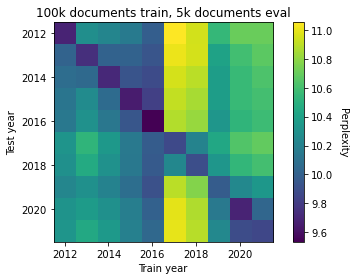

In [40]:
# From the gpt2 paper:
# "All results presented in this paper use a preliminary version of
# WebText which does not include links created after Dec 2017"
plt.title("100k documents train, 5k documents eval")
heatmap_from_metric(doc_perplexities, "Perplexity")

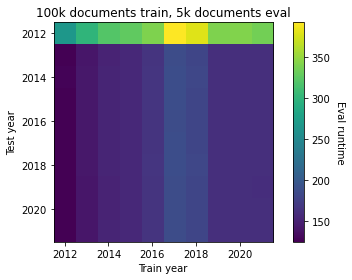

In [41]:
# 2012 ran with 2x 2080ti, other years ran with 2x titan gpus
doc_runtimes = get_metric_array("./document_level_metrics", "eval_runtime")
plt.title("100k documents train, 5k documents eval")
heatmap_from_metric(doc_runtimes, "Eval runtime")

# need to run with datasets that use a consistant number of tokens
# num documents could be causing this large shift in perplexities accross year....

# In "mind the gap":
# "For each dataset, we pick the last two years (i.e. 2018 and 2019) as our evaluation period,
# and sub-sample a test set of 24k test documents (1k per test month)""
# Is it a problem that they sample by document instead of by number of tokens in their paper?

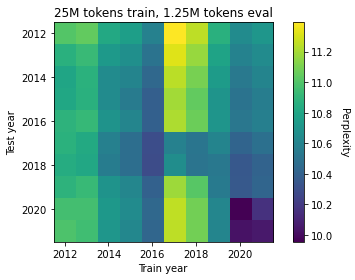

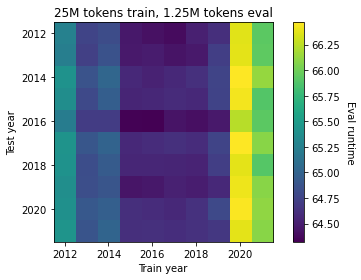

In [42]:
token_perplexities = get_metric_array("./token_level_metrics_25000000", "eval_loss") ** 2
token_runtimes = get_metric_array("./token_level_metrics_25000000/", "eval_runtime")
plt.title("25M tokens train, 1.25M tokens eval")
heatmap_from_metric(token_perplexities, "Perplexity")
plt.title("25M tokens train, 1.25M tokens eval")
heatmap_from_metric(token_runtimes, "Eval runtime")

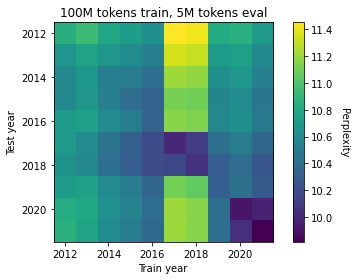

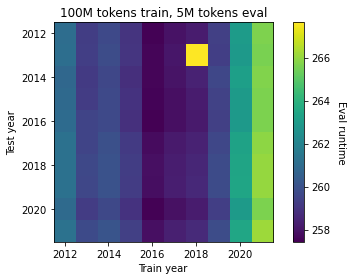

In [43]:
token_perplexities = get_metric_array("./token_level_metrics_100000000", "eval_loss") ** 2
token_runtimes = get_metric_array("./token_level_metrics_100000000/", "eval_runtime")
plt.title("100M tokens train, 5M tokens eval")
heatmap_from_metric(token_perplexities, "Perplexity")
plt.title("100M tokens train, 5M tokens eval")
heatmap_from_metric(token_runtimes, "Eval runtime")